In [1]:
import pandas as pd
%conda install -c conda-forge pandasql

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandasql as psql
import random as rand


In [3]:
water = pd.read_csv('water_potability.csv')

In [4]:
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
seed_choice = 7
seed = rand.Random(7)

#Removing the NaN values for water data (only NaN values were in ph, sulfate and trihalomethanes)
waternonan = psql.sqldf('select * from water where ph is not null and Sulfate is not null and Trihalomethanes is not null')

In [6]:
#shuffling data
waternonan = waternonan.sample(frac=1)

waternonan

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
754,5.068796,211.689502,22781.364534,5.330123,317.103903,483.442018,14.495791,77.212274,4.362086,1
842,5.613563,204.569366,16615.908152,5.618949,316.099824,341.523672,15.173956,73.450164,3.465089,0
1830,7.719001,196.007518,13939.294022,6.935551,345.653662,423.203533,16.836786,89.338649,2.884819,0
69,6.877457,136.879214,27433.587294,7.091522,307.397088,342.196347,18.403846,81.193412,3.827650,0
453,6.161779,202.756973,12229.647584,11.523598,324.048035,344.365689,14.685927,47.803194,4.003547,1
...,...,...,...,...,...,...,...,...,...,...
1710,7.266781,178.257710,27468.681707,6.043959,314.390628,400.624987,13.665328,87.131873,3.919827,1
871,6.966835,158.043065,12256.678287,7.105619,371.517435,382.443863,14.408080,78.100735,2.957441,0
1753,7.376161,199.170160,17181.008814,6.602452,388.028517,357.372931,16.948292,75.886160,4.010235,1
782,8.575673,197.560283,15888.625207,4.865463,311.557381,464.725567,18.736927,40.224521,3.506229,0


In [7]:
#checking no NaN anywhere
check_nan = waternonan['ph' or 'Trihalomethanes' or 'Hardness' or 'Solids' or 'Chloramines' or 'Sulfate' or 'Conductivity' or 'Organic_carbon' or 'Turbidity' or 'Potability'].isnull().sum()
print(check_nan)

0


In [8]:
#data visualisation
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#plt.hist(waternonan.ph)

In [10]:
#plt.hist(waternonan.Trihalomethanes)


In [11]:
#plt.hist(waternonan.Hardness)


In [12]:
#plt.hist(waternonan.Solids)


In [13]:
#plt.hist(waternonan.Chloramines)


In [14]:
#plt.hist(waternonan.Sulfate)


In [15]:
#plt.hist(waternonan.Conductivity)


In [16]:
#plt.hist(waternonan.Organic_carbon)


In [17]:
#plt.hist(waternonan.Turbidity)


In [18]:
#plt.hist(waternonan.Potability)

In [19]:
#corellation heat map
import seaborn as sns

<AxesSubplot:>

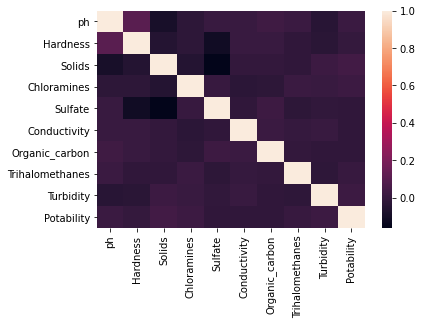

In [20]:
sns.heatmap(waternonan.corr())
#Upshot: not many extraneous variables

In [21]:
#Creating test-train split in data
import random as rand


In [22]:
# 80-20 split training data
index_list = seed.sample(range(2010), 1609)
train_set = waternonan.iloc[index_list]
train_set

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1530,6.653650,172.584512,34816.444538,8.289307,293.611048,389.471149,15.872474,67.976869,4.871406,0
1342,6.977406,205.563499,16100.967947,5.527299,371.361851,532.342083,10.346574,72.573959,5.327585,0
1590,5.946161,190.551572,12767.656229,8.939748,323.742827,499.937502,12.415430,54.095581,4.903632,0
925,7.958871,184.828557,26845.661013,7.673719,327.239109,389.264216,11.032867,52.510520,4.007903,1
552,4.487517,199.051403,36860.468899,9.751561,338.049428,390.566945,8.123470,75.668785,2.765722,0
...,...,...,...,...,...,...,...,...,...,...
489,9.393148,215.051365,20592.258942,10.089537,331.338739,447.074460,10.778633,54.426968,4.665681,1
1603,7.387434,214.293032,11694.635285,9.273679,375.505583,356.805855,15.184509,80.231172,3.830577,0
252,4.725786,249.670999,20834.294278,5.036010,378.998684,411.114485,17.769641,78.817436,3.156331,1
1194,4.704698,160.211822,5128.457646,8.283069,357.731077,344.693740,14.219532,34.288413,4.109925,1


In [23]:
# test data
test_data = waternonan.iloc[waternonan.index.difference(index_list)]
test_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1673,6.179312,159.773264,21532.519232,8.063335,272.440848,509.772110,11.010545,99.996286,2.951961,1
1059,7.566517,205.396582,30823.730490,7.816636,354.175972,395.297275,12.095251,63.767702,3.275142,0
884,6.280905,178.707200,16950.015907,7.866135,370.326350,388.552621,10.971432,74.608023,3.021289,0
434,5.624820,215.822873,9028.760345,9.256098,274.292305,340.648393,10.680673,72.487450,4.355489,1
1303,4.908900,161.243192,13516.911495,8.206212,343.305288,535.224517,14.356101,71.444915,4.196429,0
...,...,...,...,...,...,...,...,...,...,...
151,6.321259,207.257710,8532.139517,5.987877,286.489280,491.765313,10.546886,74.502808,4.501457,0
204,6.964226,212.764494,29957.191215,7.675188,321.250898,378.085546,13.127694,72.089001,3.990438,1
415,9.107330,202.514711,24678.329289,5.575906,334.717335,467.110762,12.937329,46.935252,4.492140,1
782,8.575673,197.560283,15888.625207,4.865463,311.557381,464.725567,18.736927,40.224521,3.506229,0


In [61]:
#starting the pipeline
# preprocessing
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder, QuantileTransformer, RobustScaler
from sklearn.feature_selection import VarianceThreshold, SelectFpr, f_classif
from sklearn.impute import SimpleImputer


# model training/tuning
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer


# models
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# model validation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, make_scorer


# dataframe viewing rows
pd.set_option('display.max_rows', 100)

In [25]:
feature_list = ['ph', # indicate ph
                'Hardness', # indicates hardness
                'Solids', # indicates solids
                'Chloramines', # indicates Chloramines
                'Sulfate', # indicates Sulfate
                'Conductivity', # indicates Conductivity
                'Organic_carbon', # indicates Organic_carbon
                'Trihalomethanes', # indicates Trihalomethanes
                'Turbidity'] # indicates Turbidity

In [26]:
# define feature column data, list of features feature_list was created in the section above
X = waternonan[feature_list].values

# define label column
y = waternonan['Potability'].values

In [27]:
# make 75/25 train/test split, stratified because I have imbalanced label
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=seed_choice)

In [28]:
# check size of data splits
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1608, 9)
(403, 9)
(1608,)
(403,)


In [29]:
# Define scaler step of pipeline
scaler = Normalizer()

In [30]:
# Define machine learning models

# Logistic Regression:
lr = LogisticRegression(random_state=seed_choice)

# K-nearest Neighbors:
knn = KNeighborsClassifier(n_neighbors=5)

# Naive Bayes:
nb = GaussianNB()

# Random Forest:
rf = RandomForestClassifier(random_state=seed_choice, n_estimators=5, max_depth=10, min_samples_split=10, max_leaf_nodes=13)

# Gradient Boosted Trees:
gb = GradientBoostingClassifier()

# select model to train:
model_name = rf

In [31]:
# define function to get model metrics
def model_metrics(predictions, pipe):
    
    # print summary statistics
    print('Training set score: ' + str(pipe.score(X_train,y_train)))
    print('Test set score: ' + str(pipe.score(X_test,y_test)))
    print(classification_report(y_test, predictions, digits=5))

    # plot confusion matrix
    cm = confusion_matrix(y_test, predictions, normalize='all')
    print(cm)
    disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    disp_cm.plot()

Training set score: 0.6616915422885572
Test set score: 0.6203473945409429
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40447   1.00000   0.57597       163

    accuracy                        0.40447       403
   macro avg    0.20223   0.50000   0.28799       403
weighted avg    0.16359   0.40447   0.23296       403

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


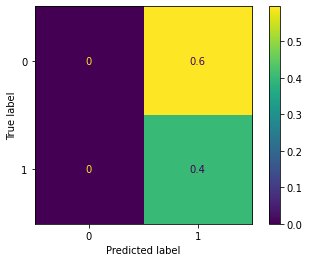

In [32]:
# make pipeline steps
pipe = make_pipeline(scaler,model_name)

# fit data to model
pipe.fit(X_train, y_train)

# save predictions on test set
predictions = model_name.predict(X_test)

# print summary statistics
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))
print(classification_report(y_test, predictions, digits=5))
print(predictions)

# plot confusion matrix
cm = confusion_matrix(y_test, predictions, normalize='all')
print(cm)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

training model:LogisticRegression(random_state=7)
Training set score: 0.5970149253731343
Test set score: 0.5955334987593052
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40447   1.00000   0.57597       163

    accuracy                        0.40447       403
   macro avg    0.20223   0.50000   0.28799       403
weighted avg    0.16359   0.40447   0.23296       403

[[0.        0.5955335]
 [0.        0.4044665]]
training model:KNeighborsClassifier()


/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training set score: 0.6990049751243781
Test set score: 0.5607940446650124
              precision    recall  f1-score   support

           0    0.60976   0.72917   0.66414       240
           1    0.43966   0.31288   0.36559       163

    accuracy                        0.56079       403
   macro avg    0.52471   0.52103   0.51486       403
weighted avg    0.54096   0.56079   0.54339       403

[[0.43424318 0.16129032]
 [0.27791563 0.12655087]]
training model:GaussianNB()
Training set score: 0.4098258706467662
Test set score: 0.4317617866004963
              precision    recall  f1-score   support

           0    0.59553   1.00000   0.74650       240
           1    0.00000   0.00000   0.00000       163

    accuracy                        0.59553       403
   macro avg    0.29777   0.50000   0.37325       403
weighted avg    0.35466   0.59553   0.44457       403

[[0.5955335 0.       ]
 [0.4044665 0.       ]]


/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachla

training model:RandomForestClassifier(max_depth=10, max_leaf_nodes=13, min_samples_split=10,
                       n_estimators=5, random_state=7)
Training set score: 0.6616915422885572
Test set score: 0.6203473945409429
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40447   1.00000   0.57597       163

    accuracy                        0.40447       403
   macro avg    0.20223   0.50000   0.28799       403
weighted avg    0.16359   0.40447   0.23296       403

[[0.        0.5955335]
 [0.        0.4044665]]
training model:GradientBoostingClassifier()
Training set score: 0.7873134328358209
Test set score: 0.630272952853598
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40447   1.00000   0.57597       163

    accuracy                        0.40447       403
   macro avg    0.20223   0.50000   0.28799       403
weighted avg   

/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


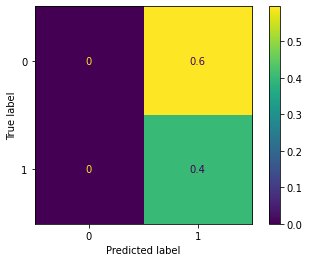

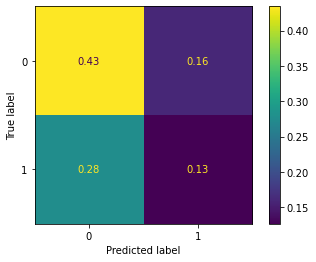

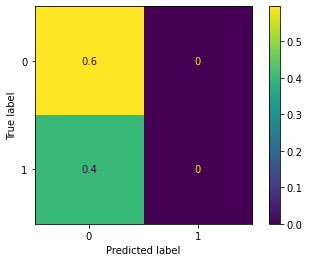

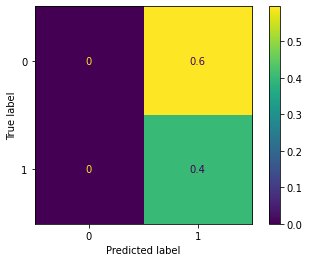

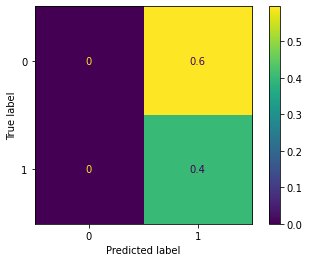

In [33]:
# create loop to test all models at once

model_names = [lr, knn, nb, rf, gb]
for name in model_names:
    print('training model:' + str(name))
    
    # define model name
    model_name = name
    
    # make pipeline steps
    pipe = make_pipeline(scaler,model_name)

    # fit data to model
    pipe.fit(X_train, y_train)

    # save predictions on test set
    predictions = model_name.predict(X_test)

    # print summary statistics
    print('Training set score: ' + str(pipe.score(X_train,y_train)))
    print('Test set score: ' + str(pipe.score(X_test,y_test)))
    print(classification_report(y_test, predictions, digits=5))
#for debugging
#    print(predictions)

    # plot confusion matrix
    cm = confusion_matrix(y_test, predictions, normalize='all')
    print(cm)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## Suggestions on how to improve predictions:
1. probably overfitting
2. tweak some parameters to see if it does stuff
3. simplify models
4. start analysing 



In [34]:
# This is a function I pulled from 
# https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv

# For each hyperparamter it fixes all other parameters to their best values 
# and plots the average score for each value of the hyperparamter.


def plot_search_results(grid):
    
    # Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    # Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    # Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [35]:
# define parameter search for each model

# Logistic Regression:
lr = LogisticRegression(random_state=seed_choice, solver='liblinear', max_iter=1000)

lr_param_grid = {'logisticregression__penalty': ['l1', 'l2'],
                 'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10, 25]
                }

# K-nearest Neighbors:
knn = KNeighborsClassifier(n_neighbors=10)

knn_param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
                  'kneighborsclassifier__weights': ['uniform', 'distance'],
                  'kneighborsclassifier__p': [1,2]
                 }

# Naive Bayes:
nb = GaussianNB()
# There are no meaningful paramters to tune for Naive Bayes model so we willl accept the default implementation.

# Random Forest:
rf = RandomForestClassifier(random_state=seed_choice, n_jobs=-1)

rf_param_grid = {'randomforestclassifier__n_estimators': [5, 10, 25, 50, 100],
                 'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
                 'randomforestclassifier__max_depth': [3, 5, 10, 16],
                 'randomforestclassifier__max_features': ['sqrt', 'log2', 9],
                 'randomforestclassifier__max_samples': [0.25, 0.5, 0.75, 1]
                }

# Gradient Boosted Trees:
gb = GradientBoostingClassifier(random_state=seed_choice)

gb_param_grid = {'gradientboostingclassifier__n_estimators': [10, 25, 50, 100],
                 'gradientboostingclassifier__loss': ['log_loss', 'exponential'],
                 'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.5, 1],
                 'gradientboostingclassifier__subsample': [0.1, 0.5, 0.75, 1],
                 'gradientboostingclassifier__max_depth': [3, 5, 10, 16],
                 'gradientboostingclassifier__max_features': ['sqrt', 'log2', 9],
                }

In [36]:
# define workflow to perform grid search on a model 
#  and print the summary statistics for the best parameters 
#   and plot the results of the cross validation.
def search_train_evaluate_plot(model_name, param_grid, scorer):
    
    # define pipeline
    pipe = make_pipeline(scaler,model_name)

    # define parameter search
    grid_search = GridSearchCV(pipe, param_grid, cv=4, refit = True, verbose = 1, return_train_score=True, scoring=scorer, n_jobs=-1) 

    # train the model on grid search 
    grid_search.fit(X_train, y_train) 

    # print best parameters after tuning 
    print(grid_search.best_params_) 
    best_predictions = grid_search.predict(X_test) 

    # print summary of metrics for best parameters
    model_metrics(best_predictions, grid_search)
    
    # plot results of grid search
    plot_search_results(grid_search)



Fitting 4 folds for each of 16 candidates, totalling 64 fits
{'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'uniform'}
Training set score: 0.6871890547263682
Test set score: 0.5235732009925558
              precision    recall  f1-score   support

           0    0.58108   0.71667   0.64179       240
           1    0.36449   0.23926   0.28889       163

    accuracy                        0.52357       403
   macro avg    0.47278   0.47797   0.46534       403
weighted avg    0.49348   0.52357   0.49905       403

[[0.42679901 0.16873449]
 [0.30769231 0.09677419]]


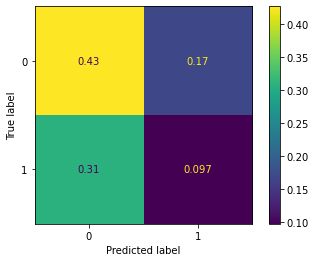

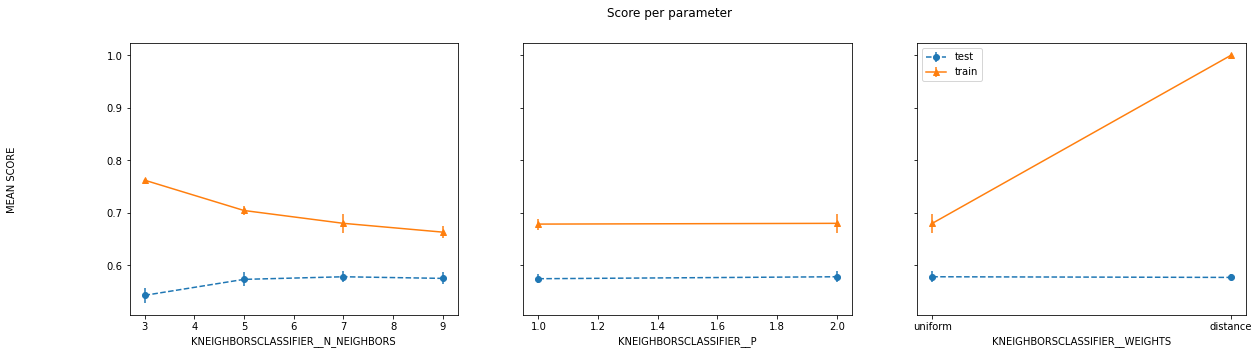

In [37]:
# define names for model
model_name = knn
param_grid = knn_param_grid
scorer = make_scorer(accuracy_score)
#scorer = make_scorer(recall_score)

# run model workflow
search_train_evaluate_plot(model_name, param_grid, scorer)

In [38]:
# define workflow for training and printing model evaluation metrics
def train_and_evaluate(scaler,model_name):
    
    # make pipeline steps
    pipe = make_pipeline(scaler,model_name)

    # fit data to model
    pipe.fit(X_train, y_train)

    # save predictions on test set
    predictions = pipe.predict(X_test)

    # display results and metrics
    model_metrics(predictions, pipe)


training model:LogisticRegression(max_iter=1000, random_state=7, solver='liblinear')
Fitting 4 folds for each of 12 candidates, totalling 48 fits
{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l1'}
Training set score: 0.5970149253731343
Test set score: 0.5955334987593052
              precision    recall  f1-score   support

           0    0.59553   1.00000   0.74650       240
           1    0.00000   0.00000   0.00000       163

    accuracy                        0.59553       403
   macro avg    0.29777   0.50000   0.37325       403
weighted avg    0.35466   0.59553   0.44457       403

[[0.5955335 0.       ]
 [0.4044665 0.       ]]


/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


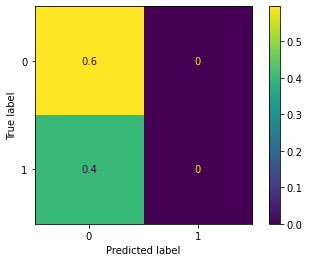

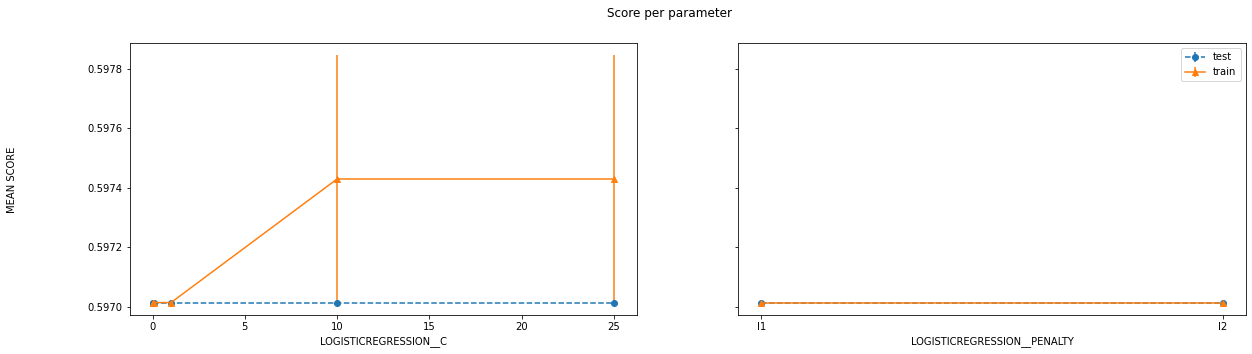

training model:KNeighborsClassifier(n_neighbors=10)
Fitting 4 folds for each of 16 candidates, totalling 64 fits
{'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'uniform'}
Training set score: 0.6871890547263682
Test set score: 0.5235732009925558
              precision    recall  f1-score   support

           0    0.58108   0.71667   0.64179       240
           1    0.36449   0.23926   0.28889       163

    accuracy                        0.52357       403
   macro avg    0.47278   0.47797   0.46534       403
weighted avg    0.49348   0.52357   0.49905       403

[[0.42679901 0.16873449]
 [0.30769231 0.09677419]]


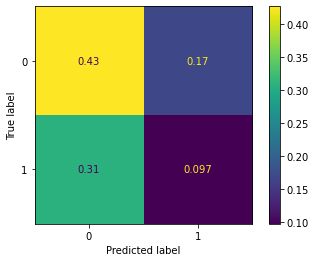

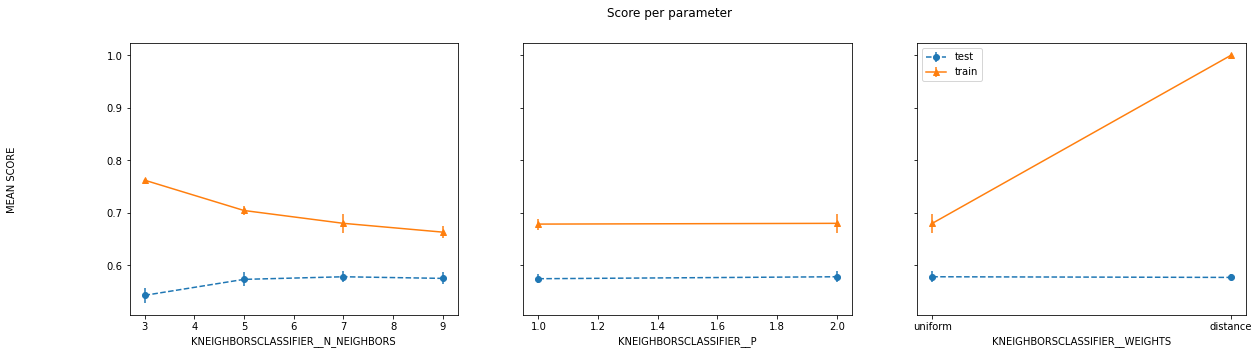

training model:GaussianNB()
Training set score: 0.4098258706467662
Test set score: 0.4317617866004963
              precision    recall  f1-score   support

           0    0.78947   0.06250   0.11583       240
           1    0.41406   0.97546   0.58135       163

    accuracy                        0.43176       403
   macro avg    0.60177   0.51898   0.34859       403
weighted avg    0.63763   0.43176   0.30412       403

[[0.03722084 0.55831266]
 [0.00992556 0.39454094]]
training model:RandomForestClassifier(n_jobs=-1, random_state=7)
Fitting 4 folds for each of 720 candidates, totalling 2880 fits
{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 16, 'randomforestclassifier__max_features': 9, 'randomforestclassifier__max_samples': 0.75, 'randomforestclassifier__n_estimators': 100}
Training set score: 0.9900497512437811
Test set score: 0.6550868486352357
              precision    recall  f1-score   support

           0    0.66667   0.84167   0.7

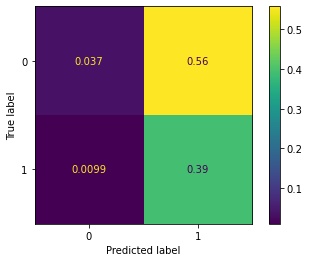

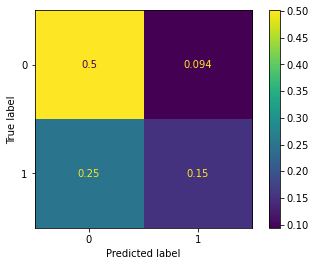

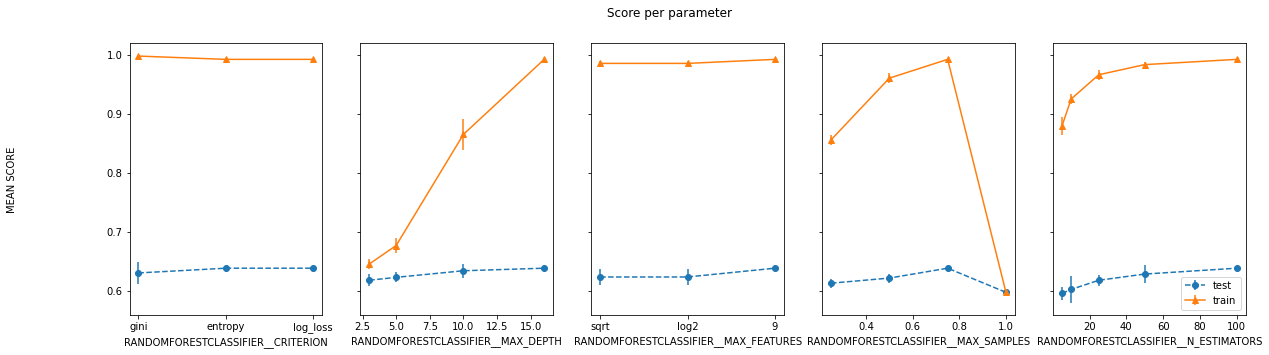

training model:GradientBoostingClassifier(random_state=7)
Fitting 4 folds for each of 1536 candidates, totalling 6144 fits
{'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__loss': 'log_loss', 'gradientboostingclassifier__max_depth': 10, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__n_estimators': 25, 'gradientboostingclassifier__subsample': 1}
Training set score: 0.9813432835820896
Test set score: 0.6451612903225806
              precision    recall  f1-score   support

           0    0.65696   0.84583   0.73953       240
           1    0.60638   0.34969   0.44358       163

    accuracy                        0.64516       403
   macro avg    0.63167   0.59776   0.59155       403
weighted avg    0.63650   0.64516   0.61983       403

[[0.50372208 0.09181141]
 [0.2630273  0.14143921]]


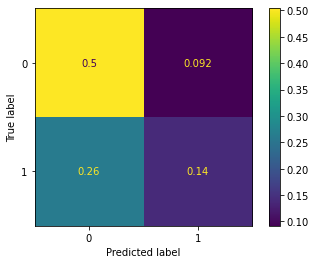

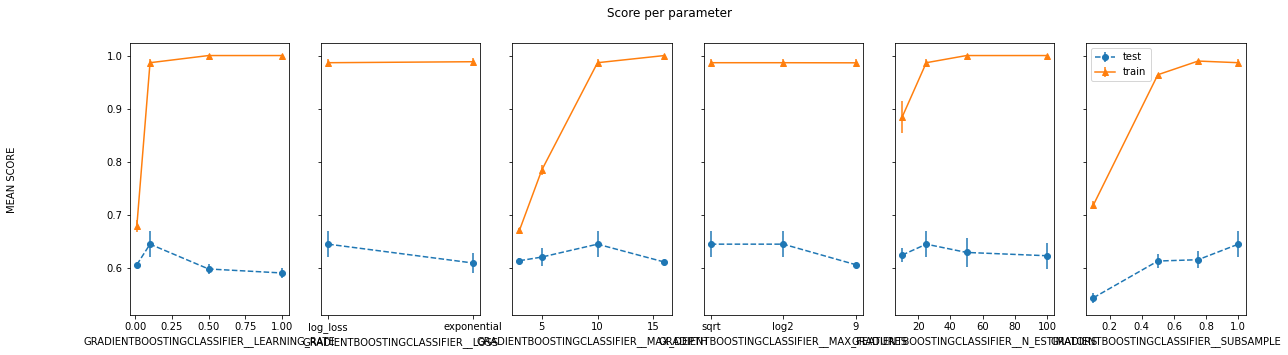

In [39]:
# create loop to test all models at once

scorer = make_scorer(accuracy_score)
#scorer = make_scorer(recall_score)

model_and_param_names = [[lr, lr_param_grid], [knn, knn_param_grid], [nb], [rf, rf_param_grid], [gb, gb_param_grid]]
for name in model_and_param_names:
    
    if name[0] == nb:
        
        print('training model:' + str(name[0]))
    
        train_and_evaluate(scaler,name[0])
    else:
        print('training model:' + str(name[0]))

        search_train_evaluate_plot(name[0], name[1], scorer)

In [40]:
# define best parameters for each model type

# Logistic Regression:
best_lr = LogisticRegression(random_state=seed_choice, solver='liblinear', max_iter=1000, penalty='l1', C=10)

# K-nearest Neighbors:
best_knn = KNeighborsClassifier(n_neighbors=9, weights='uniform', p=2)

# Naive Bayes:
best_nb = GaussianNB()
# There are no meaningful paramters to tune for Naive Bayes model so we willl accept the default implementation.

# Random Forest:
best_rf = RandomForestClassifier(random_state=seed_choice, criterion='gini', max_depth=5, max_features=9, max_samples=0.5, n_estimators=50)

# Gradient Boosted Trees:
best_gb = GradientBoostingClassifier(random_state=seed_choice, n_estimators=25, loss='log_loss', learning_rate=.1, subsample=0.75, max_depth=3, max_features=9)



In [71]:
# define workflow to perform grid search over model types 
#  and print the summary statistics for the best model 
#   and plot the results of the cross validation.

def model_search_train_evaluate_plot(scorer):
    
    # define model type parameters
    param_grid = [{'classifier': [best_lr]},
                  {'classifier': [best_knn]},
                  {'classifier': [best_nb]},
                  {'classifier': [best_rf]},
                  {'classifier': [best_gb]}
                 ]

    pipe = Pipeline([('scaler', scaler),
                     ('classifier', DummyClassifier())
                    ])
    
    
    
    # define parameter search
    grid_search = GridSearchCV(pipe, param_grid, cv=5, refit = True, verbose = 1, return_train_score=True, scoring=scorer, n_jobs=-1) 

    # train the model on grid search 
    grid_search.fit(X_train, y_train) 

    # print best parameters after tuning 
    print(grid_search.best_params_) 
    best_predictions = grid_search.predict(X_test) 

    # print summary of metrics for best parameters
    #model_metrics(best_predictions, grid_search)
    
    # print score for each fit
    print('mean test scores:' + str(grid_search.cv_results_['mean_test_score']))
    print('mean train scores:' + str(grid_search.cv_results_['mean_train_score']))
    x = np.arange(grid_search.cv_results_['mean_test_score'].shape[0])
    plt.plot(x, grid_search.cv_results_['mean_test_score'], 'bo-')
    plt.plot(x, grid_search.cv_results_['mean_train_score'], 'go-')
    
    plt.show()
    

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'classifier': GradientBoostingClassifier(max_features=9, n_estimators=25, random_state=7,
                           subsample=0.75)}
mean test scores:[0.59701631 0.57026567 0.44211993 0.6175461  0.61815948]
mean train scores:[0.59701501 0.66573366 0.44575084 0.68874062 0.69200849]


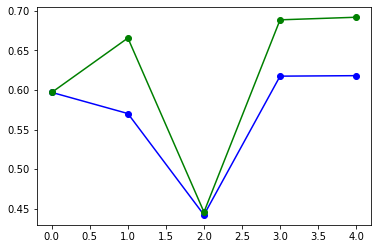

In [72]:
# choose scorer
scorer = make_scorer(accuracy_score)
#scorer = make_scorer(recall_score)

# search over model types
model_search_train_evaluate_plot(scorer)

In [46]:
## Best model is gradient boosted trees. We now undergo further parameter tuning

In [97]:
# define workflow to perform grid search over preproccesing steps 
#  and print the summary statistics for the best model 
#   and plot the results of the cross validation.

def model_search_train_evaluate_plot(scorer):
    
    # define model type parameters
    param_grid = [{'preprocessor__num__scaler': [MaxAbsScaler(),MinMaxScaler(),Normalizer(),PowerTransformer(),QuantileTransformer(),RobustScaler(),StandardScaler()]}]


    # define pipeline steps
    numeric_transformer = Pipeline(steps=[('scaler', scaler),('num_selector',SelectFpr(score_func=f_classif, alpha=0.05))])

    categorical_transformer = Pipeline(steps=[('dummy',SimpleImputer())])
    
    preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, feature_list),
                    ("cat", categorical_transformer, cat_features)])
    
    pipe = Pipeline([('preprocessor', preprocessor),
                     ('classifier', best_gb)
                    ])
    
    # define parameter search
    grid_search = GridSearchCV(pipe, param_grid, cv=4, refit = True, verbose = 1, return_train_score=True, scoring=scorer, error_score='raise', n_jobs=-1) 

    # train the model on grid search 
    grid_search.fit(X_train, y_train) 

    # print best parameters after tuning 
    print(grid_search.best_params_) 
    best_predictions = grid_search.predict(X_test) 

    # print summary of metrics for best parameters
    #model_metrics(best_predictions, grid_search)
    
    # print score for each fit
    print('mean test scores:' + str(grid_search.cv_results_['mean_test_score']))
    print('mean train scores:' + str(grid_search.cv_results_['mean_train_score']))
    x = np.arange(grid_search.cv_results_['mean_test_score'].shape[0])
    plt.plot(x, grid_search.cv_results_['mean_test_score'], 'bo-')
    plt.plot(x, grid_search.cv_results_['mean_train_score'], 'go-')

    plt.show()

In [98]:
# choose score
#scorer = make_scorer(accuracy_score)
scorer = make_scorer(recall_score)

# search over scalers
model_search_train_evaluate_plot(scorer)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


ValueError: Specifying the columns using strings is only supported for pandas DataFrames

Fitting 5 folds for each of 7 candidates, totalling 35 fits


IndexError: list index out of range